<a href="https://colab.research.google.com/github/rindanh/Latihan-NDSC/blob/main/hotel-booking/Hotel-Booking-Raihan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import time
from tqdm.notebook import tqdm

### **Bagi data train test**

In [2]:
url = 'https://raw.githubusercontent.com/rindanh/Latihan-NDSC/main/hotel-booking/'
df = pd.read_csv(url + "hotel_bookings.csv")

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_canceled', 'reservation_status'])
Y = df.is_canceled

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

### **Lomba**

In [4]:
X_train.head().T

,3156,89504,106904,11711,44774
hotel,Resort Hotel,City Hotel,City Hotel,Resort Hotel,City Hotel
lead_time,36,5,1,322,57
arrival_date_year,2015,2016,2017,2017,2015
arrival_date_month,November,May,March,May,October
arrival_date_week_number,47,21,9,21,41
arrival_date_day_of_month,20,19,2,26,10
stays_in_weekend_nights,0,0,0,2,2
stays_in_week_nights,2,3,3,4,1
adults,2,2,2,2,2
children,0,2,0,0,0


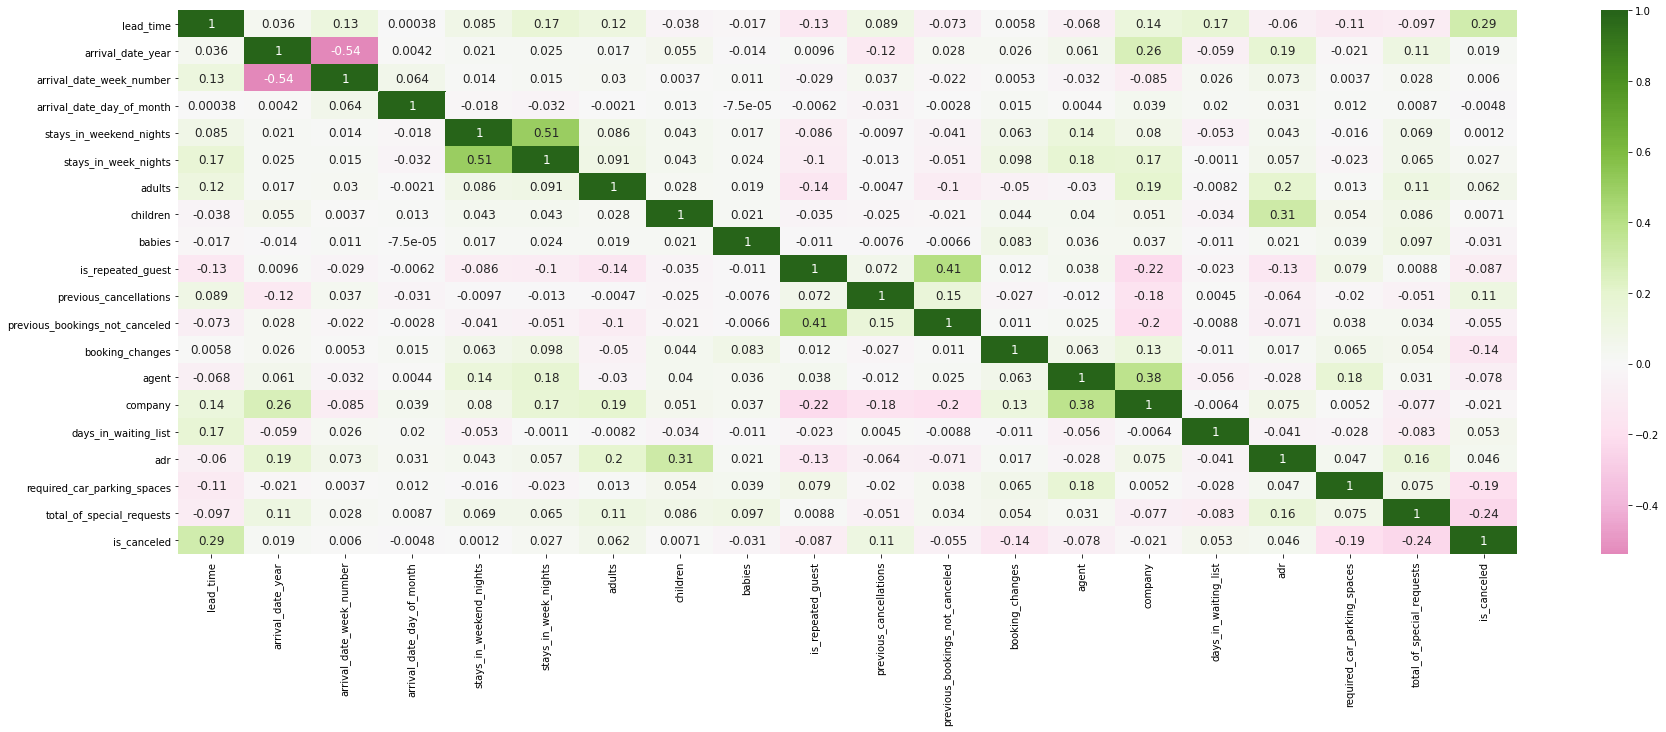

In [5]:
data = pd.concat([X_train, Y_train], axis=1)

fig, ax = plt.subplots(figsize=(30, 10))

ax = sns.heatmap(data.corr(), cmap='PiYG', annot=True, annot_kws={"size":12}, center=0)

In [6]:
X_train.agent[X_train.distribution_channel].isna().sum()

KeyError: ignored

In [7]:
X_train.groupby("distribution_channel")['agent'].count()

distribution_channel
Corporate      566
Direct        3431
GDS             96
TA/TO        47420
Undefined        2
Name: agent, dtype: int64

In [8]:
X_train.groupby("distribution_channel")['company'].count()

distribution_channel
Corporate    2546
Direct        396
GDS             1
TA/TO         462
Undefined       0
Name: company, dtype: int64

In [9]:
def dataset_summary(df) :

    # Buat summary dataframe
    summary_df = pd.DataFrame()

    # Isi summary
    summary_df['Var'] = df.columns
    summary_df['Dtypes'] = df.dtypes.values
    summary_df['Total Missing'] = df.isnull().sum().values
    summary_df['Missing%'] = summary_df['Total Missing'] / len(df) * 100
    summary_df['Total Unique'] = df.nunique().values
    summary_df['Unique%'] = summary_df['Total Unique'] / len(df) * 100

    # Ukuran dataset
    print('Dataset dimension :',df.shape)

    return summary_df

In [10]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,59695.0,104.048664,106.715077,0.0,18.0,69.0,161.0,629.0
arrival_date_year,59695.0,2016.156429,0.706731,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,59695.0,27.165893,13.607515,1.0,16.0,27.0,38.0,53.0
arrival_date_day_of_month,59695.0,15.806064,8.795509,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,59695.0,0.929944,1.003971,0.0,0.0,1.0,2.0,18.0
stays_in_week_nights,59695.0,2.507161,1.919270,0.0,1.0,2.0,3.0,42.0
adults,59695.0,1.856202,0.614780,0.0,2.0,2.0,2.0,50.0
children,59691.0,0.105410,0.400426,0.0,0.0,0.0,0.0,3.0
babies,59695.0,0.007790,0.097148,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,59695.0,0.032365,0.176968,0.0,0.0,0.0,0.0,1.0


<BarContainer object of 6265 artists>

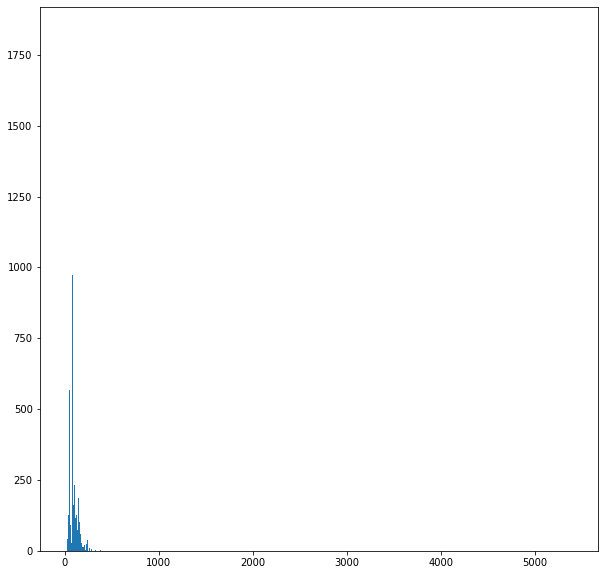

In [12]:
z = X_train.adr.value_counts()
plt.figure(figsize=(10, 10))
plt.bar(z.index, z.values)

In [13]:
z.sort_index()

0.00       1012
0.26          1
0.50          1
1.00          6
1.56          2
           ... 
387.00        1
388.00        2
450.00        1
510.00        1
5400.00       1
Name: adr, Length: 6265, dtype: int64

In [14]:
dataset_summary(X_train).sort_values(by='Unique%', ascending=False)

Dataset dimension : (59695, 30)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
26,adr,float64,0,0.000000,6265,10.495016
29,reservation_status_date,object,0,0.000000,904,1.514365
1,lead_time,int64,0,0.000000,471,0.789011
22,agent,float64,8180,13.702990,300,0.502555
23,company,float64,56290,94.296005,295,0.494179
12,country,object,243,0.407069,157,0.263004
24,days_in_waiting_list,int64,0,0.000000,113,0.189296
17,previous_bookings_not_canceled,int64,0,0.000000,54,0.090460
4,arrival_date_week_number,int64,0,0.000000,53,0.088785
7,stays_in_week_nights,int64,0,0.000000,32,0.053606


In [15]:
!pip install optuna

     |████████████████████████████████| 266kB 7.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163kB 10.9MB/s 
     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 81kB 6.9MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 133kB 15.4MB/s 
     |████████████████████████████████| 112kB 14.1MB/s 
  Created wheel for optuna: filename=optuna-2.3.0-cp36-none-any.whl size=359761 sha256=25ba5a9c906c751f3a76de3e49ea198ef8acbd448cd1f4ac8662d4c8c0370b0e
  Stored in directory: /root/.cache/pip/wheels/fa/91/19/64b0ec6b964f89c0695a9dc6db6f851d0b54c5381a5c9cadfb
Successfully built optuna
  Created wheel for PrettyTable: filename=prettytable-0.7.2-cp36-none-any.whl size=13700 sha256=2c044ca119bacff3a712ed97093e9c70729d18f248f0d8c956afeba5c8d15eff
  Stored in directory: /root/.cache/pip/whe

In [16]:
import optuna